
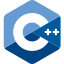
<br>

<div style="text-align:center; font-size:200%;">
  <b>Adventure: Connections</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Academy Munich</div>
<br/>
<!-- 08 Adventure Connections.ipynb -->
<!-- slides/module_500_solid_grasp/topic_220_grasp_connections.cpp -->


### Current state of the adventure game

- `code/completed/adventure/v2`
- `code/starter_kits/adventure_sk2`
- Classes `Location` and `World`
- `World` creates `Location` objects (Creator)
- `World` can find `Location` objects (Information Expert)


- Connecting the `Location` objects
- Two new responsibilities:
  - Creating the connections (Doing)
  - Storing the connections (Knowing)


<img src="img/adventure-v2-overview.svg"
     style="display:block;margin:auto;width:30%"/>


### Who should create the connections?

**Creator:** Who has the initialization data?

<ul class="fragment">
<li><tt>World</tt></li>
<li>(We need the data of all locations)</li>
</ul>


### Who should store the connections?

**Information Expert:** Who has the data?

<ul class="fragment">
  <li>The class with the most information</li>
  <li><tt>World</tt> creates all connection data</li>
  <li>Therefore, <tt>World</tt> is the information expert</li>
  <li>The connection data is stored in <tt>World</tt></li>
</ul>


**This is not a correct application of Information Expert!**


### What is the problem?

- `code/completed/adventure/v3a`


```cpp
struct Connection {
    const Location* from;
    std::string direction;
    const Location* to;
};
```


```cpp
class World {
public:
    // ...
    const Location& GetConnectedLocation(
        const Location& location, const std::string& direction) const;

private:
    // ...
    std::vector<Connection> connections;
};
```


<img src="img/adventure-v3a-overview.svg"
     style="display:block;margin:auto;width:50%"/>


- Most common use case for "connections in direction":
  - Navigation from the location on which a pawn stands to another location
- How does this work with this implementation?
  - `world.GetConnectedLocation(room1, "north")`
  - We have a dependency on `World` and `Location`!


<img src="img/adv-domain-03-small.svg"
     style="display:block;margin:auto;width:70%"/>


### How can we avoid this?

- Move responsibility for navigation to another class
- Each `Location` knows its outgoing connections
- `room1.GetConnectedLocation("north")`


### Did Information Expert mislead us?

No. In this case, the information expert does not say much if we apply it
correctly:

- The responsibility we want to assign is storing the connections
- Each connection is a relationship between two locations
- It does not matter that `World` knows all locations
- We do not have an information expert for storing the connections


### Solutions

- Associated Doing Responsibility:
 - Find an associated doing responsibility,
 - Pick the class that should be responsible, and
 - Assign the data so that the class becomes the information expert
- Use other patterns or techniques to assign the responsibility


<img src="img/adventure-v3b-overview.svg"
     style="display:block;margin:auto;width:30%"/>


### Rule of thumb: Local information > Global state

- Try to keep responsibility for information as local as possible
- This almost always reduces coupling in the system